In [29]:
using DelimitedFiles

# nacteni dat ze souboru
pot_fig = readdlm("pot_fig_data.dat")  
E_fig = readdlm("E_fig_data.dat")

192×2 Array{Float64,2}:
 -0.000561595  1748.51
 -0.000558176  1712.59
 -0.000554757  1676.66
 -0.000551338  1640.74
 -0.000547919  1604.81
 -0.0005445    1568.89
 -0.000541081  1532.96
 -0.000537662  1497.04
 -0.000534008  1470.55
 -0.000530353  1445.55
 -0.000526699  1420.55
 -0.000523045  1395.55
 -0.00051939   1370.55
  ⋮                   
  0.000523045  1395.55
  0.000526699  1420.55
  0.000530353  1445.55
  0.000534008  1470.55
  0.000537662  1497.04
  0.000541081  1532.96
  0.0005445    1568.89
  0.000547919  1604.81
  0.000551338  1640.74
  0.000554757  1676.66
  0.000558176  1712.59
  0.000561595  1748.51

In [53]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false";

Vytvoreni hezkeho grafu dle potreb

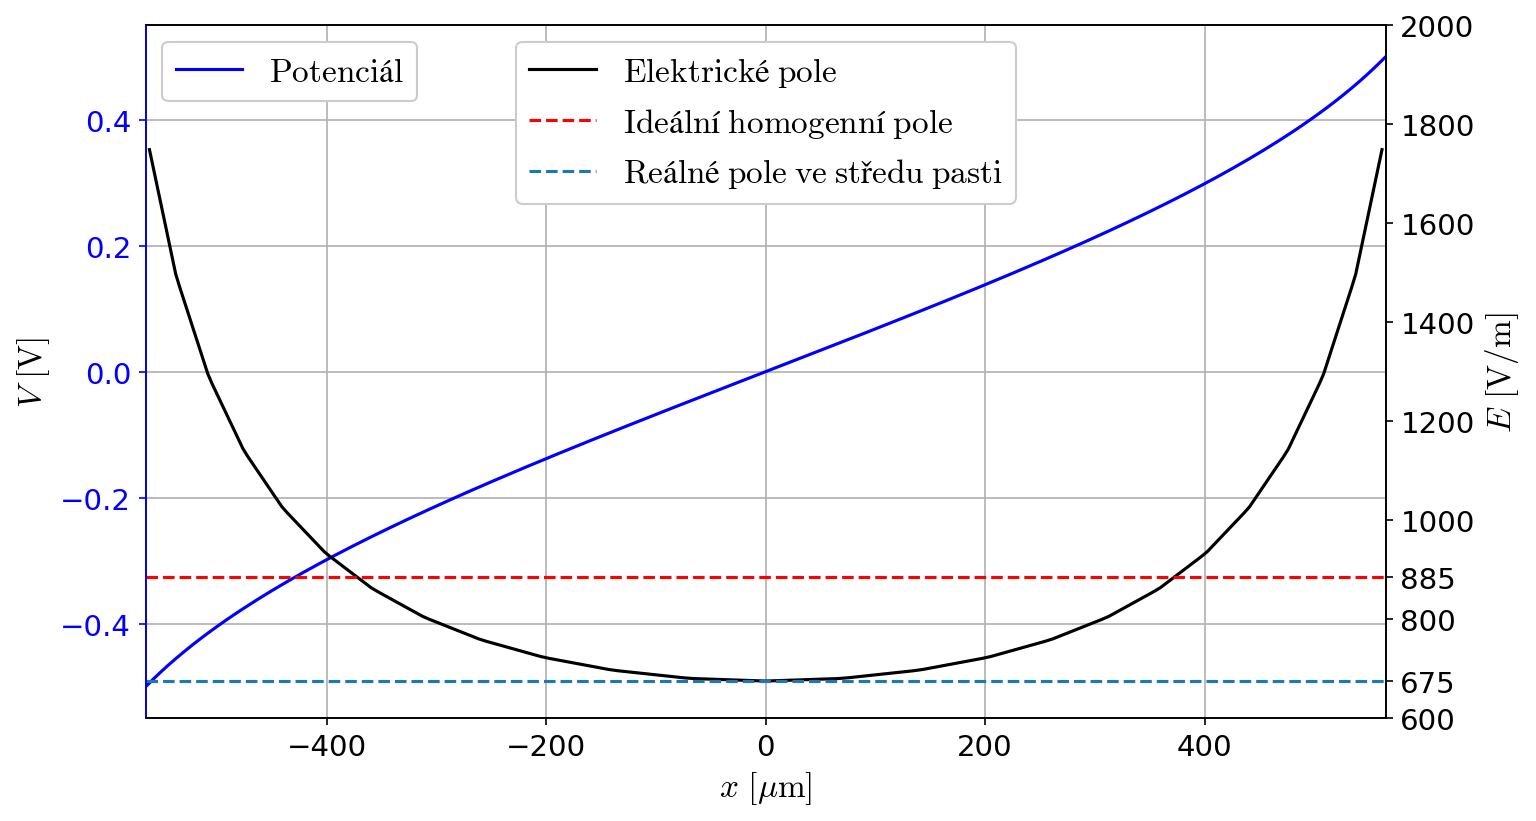

In [133]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

# idealni el_pole bude dane jako smernice delta U / delta x
# tedy 1V / 1.13 mm
E_ideal = 1/1.13e-3

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
x=gca()

line1 = x.plot(pot_fig[:,1]*1e6, pot_fig[:,2], color="blue", label=L"\rm{Potenciál}")

x.grid()


x.set(xlim=(-0.565*1e3, 0.565*1e3) )
x.set_xlabel(L"x \,\, \rm{[\mu m]}", fontsize=16)
x.set_ylabel(L"V \, \, \rm{[V]}", fontsize=16)
x.tick_params(axis="y", colors="blue")

x.legend(loc=2, framealpha=1, fontsize=16)

x2 = x.twinx()
line2 = x2.plot(E_fig[:,1]*1e6, E_fig[:,2], color="black", label=L"\rm{Elektrické \; pole}")
x2.set_ylabel(L"E \,\, \rm{[V/m]}", fontsize=16)
x2.spines["left"].set_color("blue")
x2.spines["right"].set_color("black")
x2.tick_params(axis="y", colors="black")

line3 = x2.axhline(E_ideal, color="red", linestyle="--", label=L"\rm{Ideální \; homogenní \; pole}")
line4 = x2.axhline(minimum(E_fig[:,2]), linestyle="--", label=L"\rm{Reálné \; pole \; ve \; středu \; pasti}") 

# pridani ticku s minimem E pole
yt = x2.get_yticks() 
yt=push!(yt,minimum(E_fig[:,2]))
yt= push!(yt, E_ideal)
x2.set_yticks(yt)

x2.legend(loc=9, framealpha=1, fontsize=16)

savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/dipole_alpha.svg", bbox_inches="tight")

194×2 Array{Float64,2}:
 -0.000565014  -0.5     
 -0.000561595  -0.494022
 -0.000558176  -0.488167
 -0.000554757  -0.482434
 -0.000551338  -0.476824
 -0.000547919  -0.471338
 -0.0005445    -0.465974
 -0.000541081  -0.460732
 -0.000537662  -0.455614
 -0.000534008  -0.45024 
 -0.000530353  -0.444958
 -0.000526699  -0.439766
 -0.000523045  -0.434667
  ⋮                     
  0.000526699   0.439766
  0.000530353   0.444958
  0.000534008   0.45024 
  0.000537662   0.455614
  0.000541081   0.460732
  0.0005445     0.465974
  0.000547919   0.471338
  0.000551338   0.476824
  0.000554757   0.482434
  0.000558176   0.488167
  0.000561595   0.494022
  0.000565014   0.5     

In [62]:
x.spines

Dict{Any,Any} with 4 entries:
  "left"   => PyObject <matplotlib.spines.Spine object at 0x7f6921e62450>
  "bottom" => PyObject <matplotlib.spines.Spine object at 0x7f6921e62d50>
  "right"  => PyObject <matplotlib.spines.Spine object at 0x7f6921e62fd0>
  "top"    => PyObject <matplotlib.spines.Spine object at 0x7f6921e62390>

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/dan/.julia/packages/PyCall/ttONZ/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("float() argument must be a string or a number, not 'Spine'")
  File "/home/dan/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 2795, in plot
    is not None else {}), **kwargs)
  File "/home/dan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py", line 1668, in plot
    self.add_line(line)
  File "/home/dan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py", line 1902, in add_line
    self._update_line_limits(line)
  File "/home/dan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py", line 1924, in _update_line_limits
    path = line.get_path()
  File "/home/dan/anaconda3/lib/python3.7/site-packages/matplotlib/lines.py", line 1027, in get_path
    self.recache()
  File "/home/dan/anaconda3/lib/python3.7/site-packages/matplotlib/lines.py", line 675, in recache
    y = _to_unmasked_float_array(yconv).ravel()
  File "/home/dan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 1390, in _to_unmasked_float_array
    return np.asarray(x, float)
  File "/home/dan/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py", line 85, in asarray
    return array(a, dtype, copy=False, order=order)
